In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
dump = pd.read_csv('Data_Science_Internship - Dump.csv')
dump.head()

Unnamed: 0                                           Agent_id status  \
0           0  1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...   LOST   
1           1  299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...   LOST   
2           2  c213697430c006013012dd2aca82dd9732aa0a1a6bca13...   LOST   
3           3  eac9815a500f908736d303e23aa227f0957177b0e6756b...   LOST   
4           4  1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...   LOST   

      lost_reason                budget                                lease  \
0  Not responding                   NaN                                  NaN   
1      Low budget                   NaN                                  NaN   
2  Not responding  £121 - £180 Per Week  Full Year Course Stay 40 - 44 weeks   
3      Low budget                   0-0                                    0   
4       Junk lead                   NaN                                  NaN   

     movein                                             source  \
0       NaN  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
1       NaN  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  31/08/22  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
3       NaN  ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...   
4       NaN  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                         source_city  \
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...   
3  a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                      source_country  \
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
3  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                          utm_source  \
0  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   
1  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   
2  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
3  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
4  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   

                                          utm_medium  \
0  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   
1  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   
2  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
3  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
4  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   

                                            des_city  \
0  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   
1  5372372f3bf5896820cb2819300c3e681820d82c6efc54...   
2  11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...   
3  19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                         des_country room_type  \
0  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
1  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
2  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...   Ensuite   
3  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...       NaN   

                                             lead_id  
0  cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...  
1  b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...  
2  96ea4e2bf04496c044745938c0299c264c3f4ba079e572...  
3  1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...  
4  fc10fffd29cfbe93c55158fb47752a7501c211d253468c...

In [3]:
dump = dump.iloc[:,1:]
dump.head()

Agent_id status     lost_reason  \
0  1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...   LOST  Not responding   
1  299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...   LOST      Low budget   
2  c213697430c006013012dd2aca82dd9732aa0a1a6bca13...   LOST  Not responding   
3  eac9815a500f908736d303e23aa227f0957177b0e6756b...   LOST      Low budget   
4  1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...   LOST       Junk lead   

                 budget                                lease    movein  \
0                   NaN                                  NaN       NaN   
1                   NaN                                  NaN       NaN   
2  £121 - £180 Per Week  Full Year Course Stay 40 - 44 weeks  31/08/22   
3                   0-0                                    0       NaN   
4                   NaN                                  NaN       NaN   

                                              source  \
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
3  ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                         source_city  \
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...   
3  a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                      source_country  \
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
3  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                          utm_source  \
0  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   
1  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   
2  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
3  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
4  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   

                                          utm_medium  \
0  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   
1  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   
2  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
3  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
4  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   

                                            des_city  \
0  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   
1  5372372f3bf5896820cb2819300c3e681820d82c6efc54...   
2  11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...   
3  19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                         des_country room_type  \
0  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
1  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
2  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...   Ensuite   
3  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...       NaN   

                                             lead_id  
0  cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...  
1  b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...  
2  96ea4e2bf04496c044745938c0299c264c3f4ba079e572...  
3  1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...  
4  fc10fffd29cfbe93c55158fb47752a7501c211d253468c...

In [4]:
dump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       23061 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.3+ MB


In [5]:
dump.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

###  STATUS other than ‘WON’ or ‘LOST’  are dropped

In [6]:
status_index = dump['status'].value_counts().index[2:]
status_index

Index(['OPPORTUNITY', 'CONTACTED', 'PROCESSING', 'IMPORTANT'], dtype='object')

In [7]:
dump.set_index('status', inplace = True)

In [8]:
dump.drop(index = status_index, axis = 1, inplace = True)

In [9]:
dump.reset_index(inplace = True)
dump.head()

status                                           Agent_id     lost_reason  \
0   LOST  1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...  Not responding   
1   LOST  299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...      Low budget   
2   LOST  c213697430c006013012dd2aca82dd9732aa0a1a6bca13...  Not responding   
3   LOST  eac9815a500f908736d303e23aa227f0957177b0e6756b...      Low budget   
4   LOST  1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...       Junk lead   

                 budget                                lease    movein  \
0                   NaN                                  NaN       NaN   
1                   NaN                                  NaN       NaN   
2  £121 - £180 Per Week  Full Year Course Stay 40 - 44 weeks  31/08/22   
3                   0-0                                    0       NaN   
4                   NaN                                  NaN       NaN   

                                              source  \
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
3  ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                         source_city  \
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...   
3  a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                      source_country  \
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
3  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                          utm_source  \
0  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   
1  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   
2  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
3  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
4  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   

                                          utm_medium  \
0  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   
1  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   
2  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
3  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
4  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   

                                            des_city  \
0  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   
1  5372372f3bf5896820cb2819300c3e681820d82c6efc54...   
2  11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...   
3  19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                         des_country room_type  \
0  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
1  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
2  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...   Ensuite   
3  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...       NaN   

                                             lead_id  
0  cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...  
1  b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...  
2  96ea4e2bf04496c044745938c0299c264c3f4ba079e572...  
3  1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...  
4  fc10fffd29cfbe93c55158fb47752a7501c211d253468c...

In [10]:
dump['status'].value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

In [11]:
dump.shape

(46317, 15)

### Deleting unnecessary columns 

In [12]:
drop_cols = ['Agent_id', 'source', 'source_city', 'source_country', 'utm_source', 
             'utm_medium', 'des_city', 'des_country', 'lead_id']
dump.drop(drop_cols, axis = 1, inplace = True)
dump.head()

status     lost_reason                budget  \
0   LOST  Not responding                   NaN   
1   LOST      Low budget                   NaN   
2   LOST  Not responding  £121 - £180 Per Week   
3   LOST      Low budget                   0-0   
4   LOST       Junk lead                   NaN   

                                 lease    movein room_type  
0                                  NaN       NaN       NaN  
1                                  NaN       NaN       NaN  
2  Full Year Course Stay 40 - 44 weeks  31/08/22   Ensuite  
3                                    0       NaN       NaN  
4                                  NaN       NaN       NaN

### Checking for any null values

- Filling the rows having null percentage more or equal to 5% with the mode of repsective columns

In [13]:
round(100 * (dump.isnull().sum() / len(dump)), 2)

status          0.00
lost_reason     6.63
budget          7.98
lease           5.04
movein         29.38
room_type      50.72
dtype: float64

In [14]:
for i in dump.columns:
    if((100*(dump[i].isnull().sum()/len(dump.index))) >= 5):
        dump[i] = dump[i].fillna(value = dump[i].mode()[0])

In [15]:
dump.isnull().sum()

status         0
lost_reason    0
budget         0
lease          0
movein         0
room_type      0
dtype: int64

In [16]:
dump.head()

status     lost_reason                budget  \
0   LOST  Not responding   £60 - £120 Per week   
1   LOST      Low budget   £60 - £120 Per week   
2   LOST  Not responding  £121 - £180 Per Week   
3   LOST      Low budget                   0-0   
4   LOST       Junk lead   £60 - £120 Per week   

                                 lease    movein room_type  
0  Full Year Course Stay 40 - 44 weeks  10/09/22   Ensuite  
1  Full Year Course Stay 40 - 44 weeks  10/09/22   Ensuite  
2  Full Year Course Stay 40 - 44 weeks  31/08/22   Ensuite  
3                                    0  10/09/22   Ensuite  
4  Full Year Course Stay 40 - 44 weeks  10/09/22   Ensuite

In [17]:
dump.shape

(46317, 6)

In [18]:
# # changing the data type of 'movein'
# dump['movein'] = pd.to_datetime(dump['movein'])
# dump.head()

In [19]:
dump['status'].value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

In [20]:
cat_cols = dump.select_dtypes("object").columns
cat_cols

Index(['status', 'lost_reason', 'budget', 'lease', 'movein', 'room_type'], dtype='object')

In [21]:
plt.figure(figsize=[20,20])
for ind, col in enumerate(cat_cols):
    plt.subplot(3,2,ind+1)
    dump[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
plt.show()

**`INFERENCES:`**
- Their are almost 93% of people categorized as 'LOST'.
- The main reason for leading 'Status' as 'LOST' is due to 'LOW AVAILABILITY'.
- Almost 80% of 'Ensuite' are opted as the 'Room type'.

In [22]:
dump_main = dump.copy()
dump_main.head()

status     lost_reason                budget  \
0   LOST  Not responding   £60 - £120 Per week   
1   LOST      Low budget   £60 - £120 Per week   
2   LOST  Not responding  £121 - £180 Per Week   
3   LOST      Low budget                   0-0   
4   LOST       Junk lead   £60 - £120 Per week   

                                 lease    movein room_type  
0  Full Year Course Stay 40 - 44 weeks  10/09/22   Ensuite  
1  Full Year Course Stay 40 - 44 weeks  10/09/22   Ensuite  
2  Full Year Course Stay 40 - 44 weeks  31/08/22   Ensuite  
3                                    0  10/09/22   Ensuite  
4  Full Year Course Stay 40 - 44 weeks  10/09/22   Ensuite

## ENCODING THE CATEGORICAL VARIABLES 

In [23]:
le = LabelEncoder()
for i in dump.columns:
    dump[i] = le.fit_transform(dump[i])
dump.head()

status  lost_reason  budget  lease  movein  room_type
0       0           21    1834    266     165          0
1       0           16    1834    266     165          0
2       0           21    1752    266     463          0
3       0           16      10      2     165          0
4       0            8    1834    266     165          0

In [24]:
pd.pivot_table(dump, index = 'status')

budget       lease  lost_reason      movein  room_type
status                                                             
0       1318.600592  212.109772    17.965752  210.967949   0.499029
1       1232.925155  210.206638    15.000000  205.446469   0.489424

In [25]:
for cols in dump.columns:
    print(cols)
    print(dump[cols].value_counts())
    print()

status
0    43244
1     3073
Name: status, dtype: int64

lost_reason
15    11965
21     7827
20     6449
16     5505
29     2781
25     2264
18     1518
10     1263
7       827
24      817
2       676
8       629
0       613
26      538
17      534
22      411
23      394
1       356
19      329
5       219
9       147
11      127
13       41
4        35
6        17
28       17
12        8
14        5
27        4
3         1
Name: lost_reason, dtype: int64

budget
1834    13444
1752     8878
10       5719
1793     2143
751      1509
        ...  
1840        1
1808        1
1776        1
38          1
1823        1
Name: budget, Length: 1851, dtype: int64

lease
266    13336
2       7538
263     6451
197     3952
282     2753
       ...  
237        1
301        1
110        1
174        1
287        1
Name: lease, Length: 311, dtype: int64

movein
165    16060
463     2187
19      2118
148     1563
266     1422
       ...  
260        1
437        1
228        1
196        1
0        

## Visualizing the Data

In [26]:
# BOX PLOT
plt.figure(figsize=[20,20])
for ind, col in enumerate(cat_cols):
    plt.subplot(3,2,ind+1)
    dump[col].value_counts(normalize=True).plot.box()
    plt.title(col)
plt.show()

In [27]:
dump.describe()

status   lost_reason        budget         lease        movein  \
count  46317.000000  46317.000000  46317.000000  46317.000000  46317.000000   
mean       0.066347     17.768983   1312.916273    211.983505    210.601615   
std        0.248891      5.763430    650.173343    102.984596    117.014166   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000     15.000000    924.000000    197.000000    165.000000   
50%        0.000000     18.000000   1752.000000    266.000000    165.000000   
75%        0.000000     21.000000   1834.000000    266.000000    279.000000   
max        1.000000     29.000000   1850.000000    310.000000    468.000000   

          room_type  
count  46317.000000  
mean       0.498392  
std        1.033709  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000

In [28]:
# PAIRPLOT
sns.pairplot(dump)
plt.show()

**`INFERENCES:`**

- With the help of pair plots we can see there are no linear relationship between the variables of the dataset.
- Therefore, the problem statement is of clustering so I'll be using K-Means Clustering.

In [29]:
# DISTPLOT
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (15,11))
for ind, cols in enumerate(cat_cols):
    plt.subplot(3,2,ind+1) 
    sns.distplot(dump[cols])
    title = cols + ' distribution'
    plt.title(title)
plt.tight_layout()
plt.show()

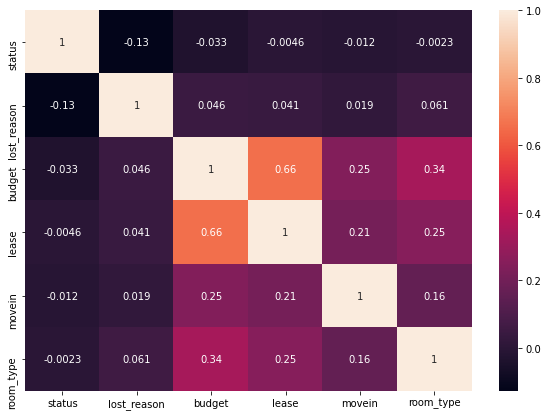

In [30]:
# HEATMAP
plt.figure(figsize=[10,7])
sns.heatmap(dump.corr(), annot = True)
plt.show()

**`INFERENCES:`**

- lost_reason and room_type mainatians 0.061 as the co-relation.
- budget and lease mainatians 0.66 as the co-relation.

## Check Hopkins Statistics (Clustering potential)

#### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
* If the value is between {0.01, ...,0.3}, the data is regularly spaced.
* If the value is around 0.5, it is random.
* If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [31]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [32]:
print("DUMP_SCALED: ", hopkins(dump))

DUMP_SCALED:  0.9543711903818265


## **Finding Optimal Value for k - Elbow Curve**

Before we apply clustering algorithm, the optimal number of clusters needs to be determined. This is facilitated through an Elbow Curve Plot.

In [33]:
k_vals = np.arange(1,15)
wss = []
for i in k_vals:
  kmodel = KMeans(n_clusters = i)
  kmodel.fit(dump)
  wss.append([i,kmodel.inertia_])

print(wss)

[[1, 20705932098.069183], [2, 5065222186.667936], [3, 1351216408.6312733], [4, 1012681645.474056], [5, 778320508.936242], [6, 687230410.9633335], [7, 599844665.9036673], [8, 523051017.8838974], [9, 480390085.0184249], [10, 437199933.9503439], [11, 395533370.19184816], [12, 357592602.82411695], [13, 325636628.8219001], [14, 309376951.2180423]]


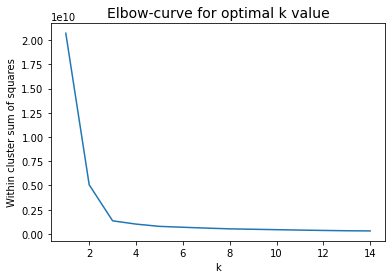

In [34]:
wss = pd.DataFrame(wss, columns = ['k', 'WSS'])

sns.lineplot(x = 'k', y = 'WSS', data = wss)
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow-curve for optimal k value', fontsize = 14)
plt.show()

- At k=3, an elbow shape can be identified. The slope of the curve changes rapidly from k=3. Therefore, k=3 is selected as the optimum value for the number of clusters.

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [35]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dump)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dump, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.677777471172469
For n_clusters=3, the silhouette score is 0.7420407344506678
For n_clusters=4, the silhouette score is 0.5421284121673254
For n_clusters=5, the silhouette score is 0.48235850502597805
For n_clusters=6, the silhouette score is 0.4864187431493417
For n_clusters=7, the silhouette score is 0.5007893911082438
For n_clusters=8, the silhouette score is 0.47272550772658645


**`INFERENCES:`**

- As the silhouette score for 3 clusters is the highest amongst the all so the optimal number of clusters of K-Means would be 3.

## **Model fitting - using the optimal k value**

In [36]:
kmodel_new = KMeans(n_clusters = 3)

kmodel_new.fit(dump)
pred_labels = kmodel_new.predict(dump)

In [37]:
# Adding the cluster labels column to the original data
dump_main['k_cluster'] = pred_labels
display(dump_main.head())

status     lost_reason                budget  \
0   LOST  Not responding   £60 - £120 Per week   
1   LOST      Low budget   £60 - £120 Per week   
2   LOST  Not responding  £121 - £180 Per Week   
3   LOST      Low budget                   0-0   
4   LOST       Junk lead   £60 - £120 Per week   

                                 lease    movein room_type  k_cluster  
0  Full Year Course Stay 40 - 44 weeks  10/09/22   Ensuite          0  
1  Full Year Course Stay 40 - 44 weeks  10/09/22   Ensuite          0  
2  Full Year Course Stay 40 - 44 weeks  31/08/22   Ensuite          0  
3                                    0  10/09/22   Ensuite          1  
4  Full Year Course Stay 40 - 44 weeks  10/09/22   Ensuite          0

# **Exploring the characteristics of each cluster**

In [38]:
display(dump_main['k_cluster'].value_counts())

0    27714
2    11372
1     7231
Name: k_cluster, dtype: int64

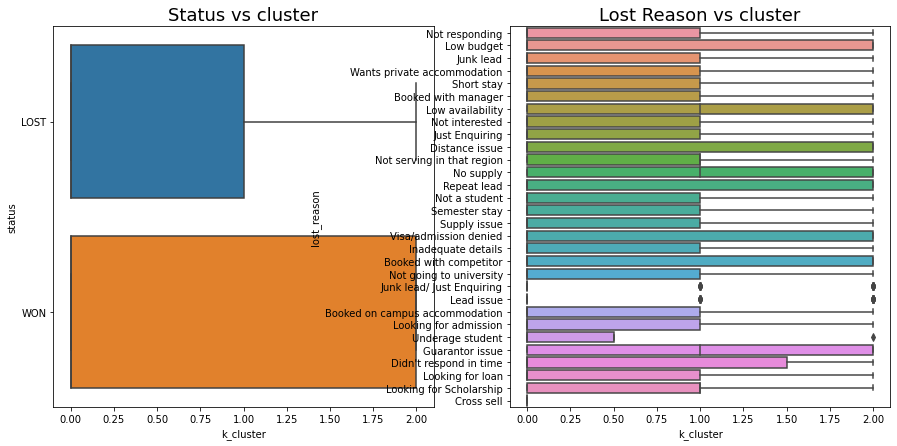

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))

plt.subplot(1,2,1)
sns.boxplot(x = 'k_cluster', y = 'status', data = dump_main)
plt.title('Status vs cluster', fontsize = 18)

plt.subplot(1,2,2)
sns.boxplot(x = 'k_cluster', y = 'lost_reason', data = dump_main)
plt.title('Lost Reason vs cluster', fontsize = 18)
plt.show()

**`INFRENCES:`**

- Their are a lot reasons behind the status being set to LOST.
- Few of them are as follows:- 
    1. Low Bugdet
    2. Low Availability
    3. Distance Issue
    4. No Supply
    5. Visa denied
    6. Book with competitor

In [40]:
fig, ax = plt.subplots(1, 3, figsize = (20,7))
plt.subplot(1,3,1)
sns.boxplot(x = 'k_cluster', y = 'budget', data = dump_main)
plt.title('Budget vs cluster', fontsize = 18)

plt.subplot(1,3,2)
sns.boxplot(x = 'k_cluster', y = 'lease', data = dump_main)
plt.title('Lease vs cluster', fontsize = 18)

plt.subplot(1,3,3)
sns.boxplot(x = 'k_cluster', y = 'room_type', data = dump_main)
plt.title('Room Type vs cluster', fontsize = 18)
plt.show()

**`INFRENCES:`**

- Their people who are opting for either Entire Place or Studio apart from the Ensuite as their Room Type.